#       The Sparks Foundation  -  Graduate Rotational Internship Program

<b> <h3>Name : Soorya E T </h3></b>



##  Task 3 : Prediction using Decision Tree Algorithm 

### Objective    :     For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically

### The purpose is, if we feed any new data to this classifier, it would be able to predict the right class accordingly.

<h2>Importing Packages</h2> 

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h2>Loading the iris dataset

In [2]:
iris=datasets.load_iris()

<h2>Forming the iris dataframe

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

print(data.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
data["Species"] = y

data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data.shape

(150, 5)

In [7]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int64
dtype: object

In [8]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
data["Species"].unique()

array([0, 1, 2])

In [10]:
data["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

<h2>Checking null values</h2>

In [11]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [12]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

<h2>EDA</h2>

<h3>Visualizing using FacetGrid and DistPlot<p>

FacetGrid : Multi- plot grid for plotting conditional relationships

DistPlot : Seaborn distplot lets you show a histogram with a line on it. A distplot plots a univariate distribution of observations.

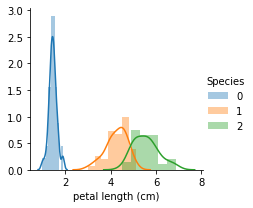

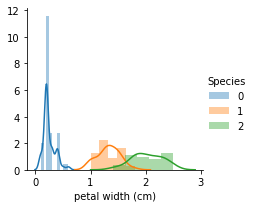

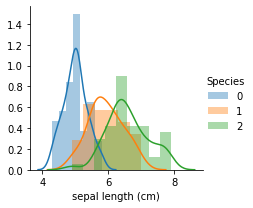

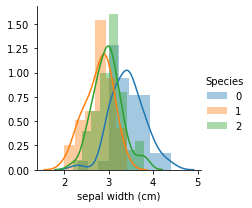

In [13]:
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"petal length (cm)").add_legend()

sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"petal width (cm)").add_legend()

sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"sepal length (cm)").add_legend()

sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"sepal width (cm)").add_legend()

plt.show()

<h3>Visualizing using violin plot

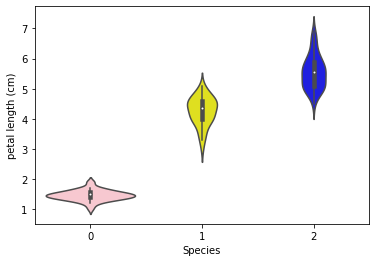

In [14]:
sns.violinplot(x="Species", y="petal length (cm)", data= data, palette = ["pink","yellow","blue"], size=6)

<h3> Correlation

In [15]:
corr_mat = data.corr()
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


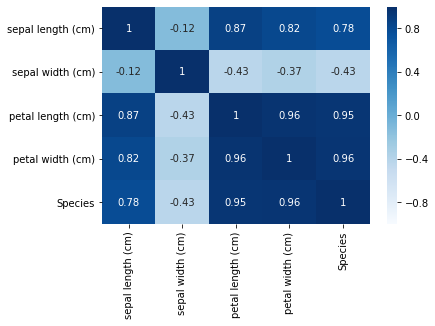

In [16]:
sns.heatmap(corr_mat,vmax=1,vmin=-1,annot=True,cmap="Blues")

<h2> Preparing the data</h2>

<h3>Dividing the data into attributes (inputs) and labels (outputs)</h3>

In [17]:
X = data.drop("Species",axis=1)
y = data["Species"]

<h2>Splitting the data into training and test sets</h2>

<h3>We will do this by using Scikit-Learn's built-in train_test_split() method</h3>

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<h2>Training the Algorithm</h2>

<h3>We have split our data into training and testing sets, and the next step is to train our algorithm.</h3>

<h3>Using Decision Tree Classifier for modelling</h3>

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier()     # creating object of DecisionTreeClassifier

dtree.fit(X_train,y_train)          # training and fitting DecisionTreeClassifier object using training data


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h2>Making Predictions </h2>


<h3>Since we have trained our algorithm, now we have to do some predictions.</h3>

In [20]:
y_pred = dtree.predict(X_test)  # Predicting for test data
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

<h2>Comparing Actual Vs Predicted </h2>

In [21]:
Results = pd.DataFrame({"Actual" : y_test,"Predicted" : y_pred})
Results=Results.reset_index()
Results.head()

,index,Actual,Predicted
0,73,1,1
1,18,0,0
2,118,2,2
3,78,1,1
4,76,1,1


<h2>Evaluating The Model</h2>

In [22]:
from sklearn.metrics import accuracy_score

print( 'Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h2> Visualizing the Decision Tree using plot_tree method from sklearn </h2>

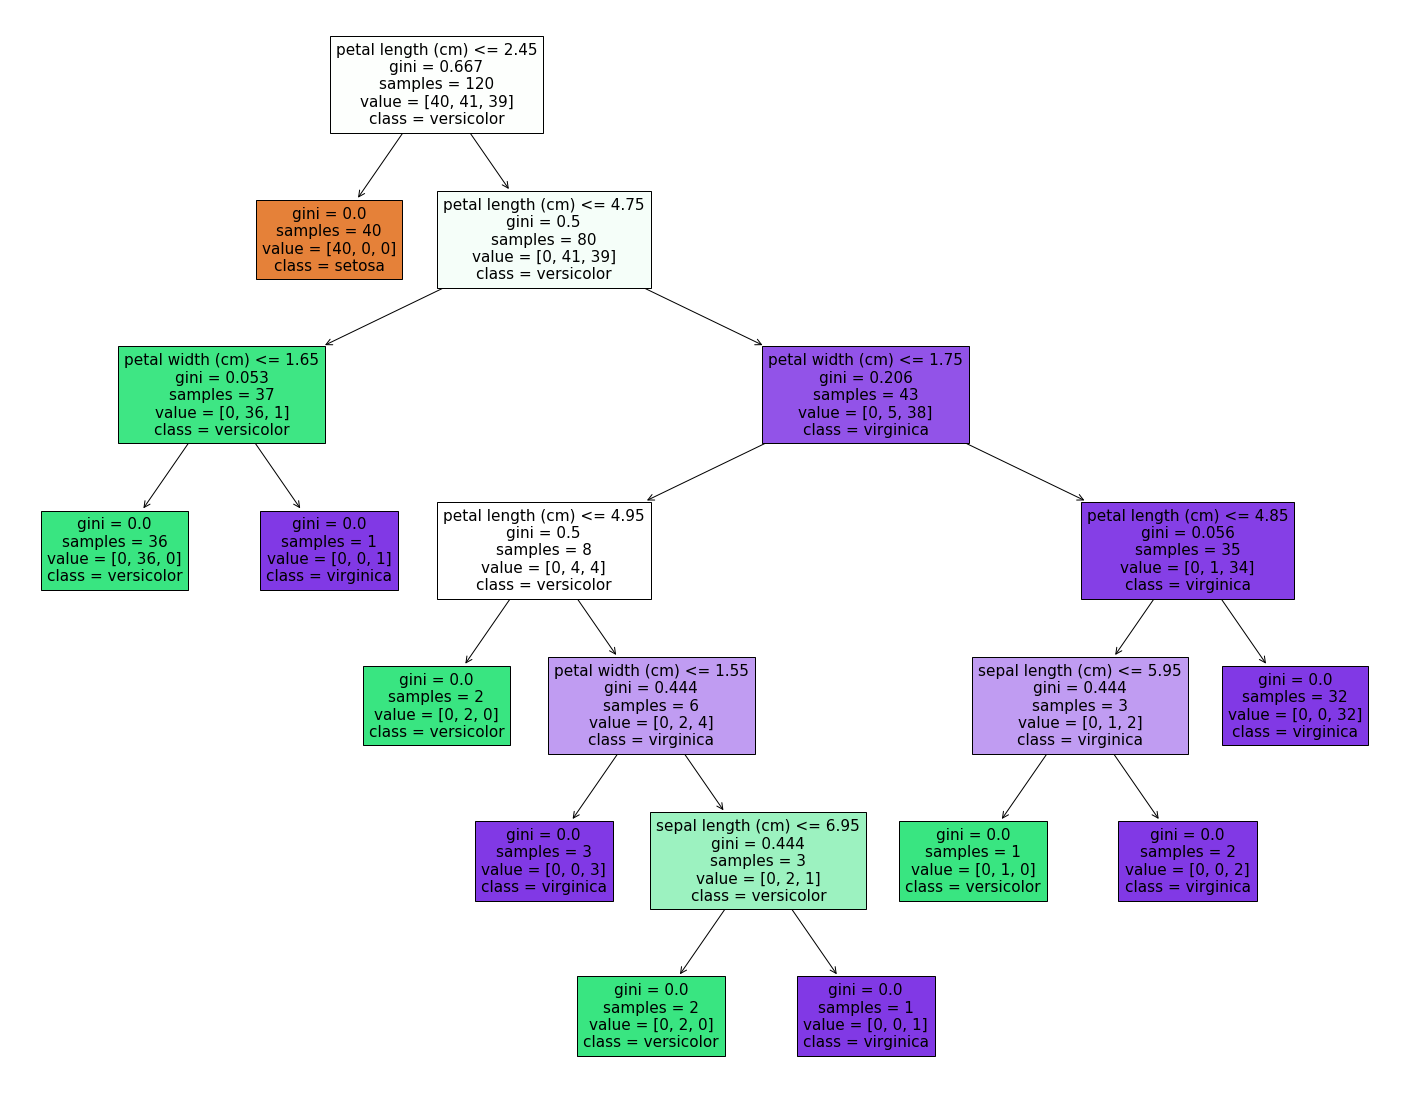

In [24]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(dtree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


<h3> Thank you